# Buka Gambar

In [8]:
from PIL import Image,ImageColor

gambar = Image.open('baboon.bmp')

# Get RGB

In [33]:
import numpy as np

def get_rgb(gambar):
    ''' Fungsi Untuk Mendapatkan Rata - Rata RGB '''
    
    #memisahkan channel
    r,g,b = gambar.split()
    
    R = np.mean(r)
    G = np.mean(g)
    B = np.mean(b)
    return R,G,B

In [34]:

#memisahkan tiap channel
r,g,b = get_rgb(gambar)

#mendapatkan rata" rgb
print("R\t:",np.mean(r))
print("G\t:",np.mean(g))
print("B\t:",np.mean(b))

R	: 137.427734375
G	: 128.89691162109375
B	: 113.1497802734375


# Get HSI

In [28]:
from math import pow,sqrt,acos,pi

def get_hsi(gambar):
    r,g,b = gambar.split()


    R = np.float32(r)/255
    G = np.float32(g)/255
    B = np.float32(b)/255


    def theta(R, G, B):
        atas = ((R-G)+(R-B))/2    
        bawah = sqrt(pow((R-G),2) + ((R-B) * (G-B)))
        
        return acos(atas / bawah)
    
    def get_hue(R, G, B):
        ''' Fungsi Untuk Mendapatkan Nilai Hue '''
#         R = R/360
#         G = G/360
#         B = B/360
        #mendapatkan contoh ukuran matrix
        H = R
        
        for b in range(len(R)):
            for k in range(len(R)):
                H[b][k] = theta(R[b][k], G[b][k], B[b][k])
                
                #jika citra B lebih besar dari citra G
                if B[b][k] > G[b][k]:
                    H[b][k] = ((360 * pi) / 180.0) - theta(R[b][k], G[b][k], B[b][k])
        
        return H
    
    def get_saturation(R, G, B):
        ''' Fungsi Untuk Mendapatkan Nilai Saturation '''
        
        #mendapatkan nilai terkecil dari citra RGB
        minimum = np.minimum(np.minimum(R, G), B)
        
        S = np.float32(1 - ((3 * minimum) / (R + G + B)))
        return S
    
    def get_intensity(R, G, B):
        ''' Fungsi Untuk Mendapatkan Nilai Intensity '''
        
        I = (R + G + B) / 3
        return I
    
#     out = np.empty_like(np.float32(gambar))
    H = np.nanmean(get_hue(R,G,B))
    S = np.nanmean(get_saturation(R,G,B))
    I = np.nanmean(get_intensity(R,G,B))
    return H, S, I

In [29]:
h,s,i = get_hsi(gambar)

/home/restu/envTA/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


In [30]:
h

2.539314

In [31]:
s

0.5883501

In [32]:
i

1.162853

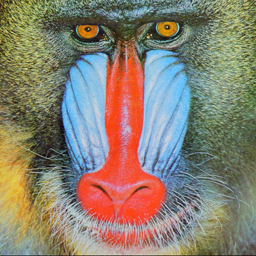

In [35]:
gambar